## **Time Series EDA**

1. Data Ingestion
2. EDA of the Data
3. Processing of the Data
4. Model Building
5. Model Evaluation

## **Data Ingestion**

1. Import the required Libraries: Import the required libraries such as Pandas, Numpy, Matplotlib, Seaborn etc.
2. Load the Data.
3. Load the Time Series into a pandas DataFrame
4. Set the DateTime column as the index of the dataframe
5. Check the datatype of the index and convert it to datetime if necessary

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/tsla.CSV')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [3]:
df.shape

(758, 8)

In [4]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          758 non-null    object 
 1   Open          758 non-null    float64
 2   High          758 non-null    float64
 3   Low           758 non-null    float64
 4   Close         758 non-null    float64
 5   Volume        758 non-null    int64  
 6   Dividends     758 non-null    int64  
 7   Stock Splits  758 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 47.5+ KB


In [6]:
# Univarient Timeseries
# Here we are taking just Date and Close Features

stock_data = df[['Date','Close']]
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [8]:
# Converting the Date column as DateTime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

/tmp/ipykernel_6545/3733530350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


## **Set Date As index column**
1. We can easily retrive the data
2. Visulization is also simple
3. Those lib has been degine in such a way it required data column as index (scipy statsmodel)

In [10]:
# Set Date as Index
stock_data = stock_data.set_index("Date")
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


## **EDA(Exploratory data analysis)**

**1. Summary Statistics**
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

**2. Visualize the Time Series Data**
- Plot the Time Series data 
- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

**3. Stationarity Check**
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

**4. Check for Autocorrelation**
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

**5. Outlier Detection**
- Detect and handle outliers using statistical methods or machine learning techniques.

**6. Check for Autocorrelation**
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

In [11]:
# Summary Statistics
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


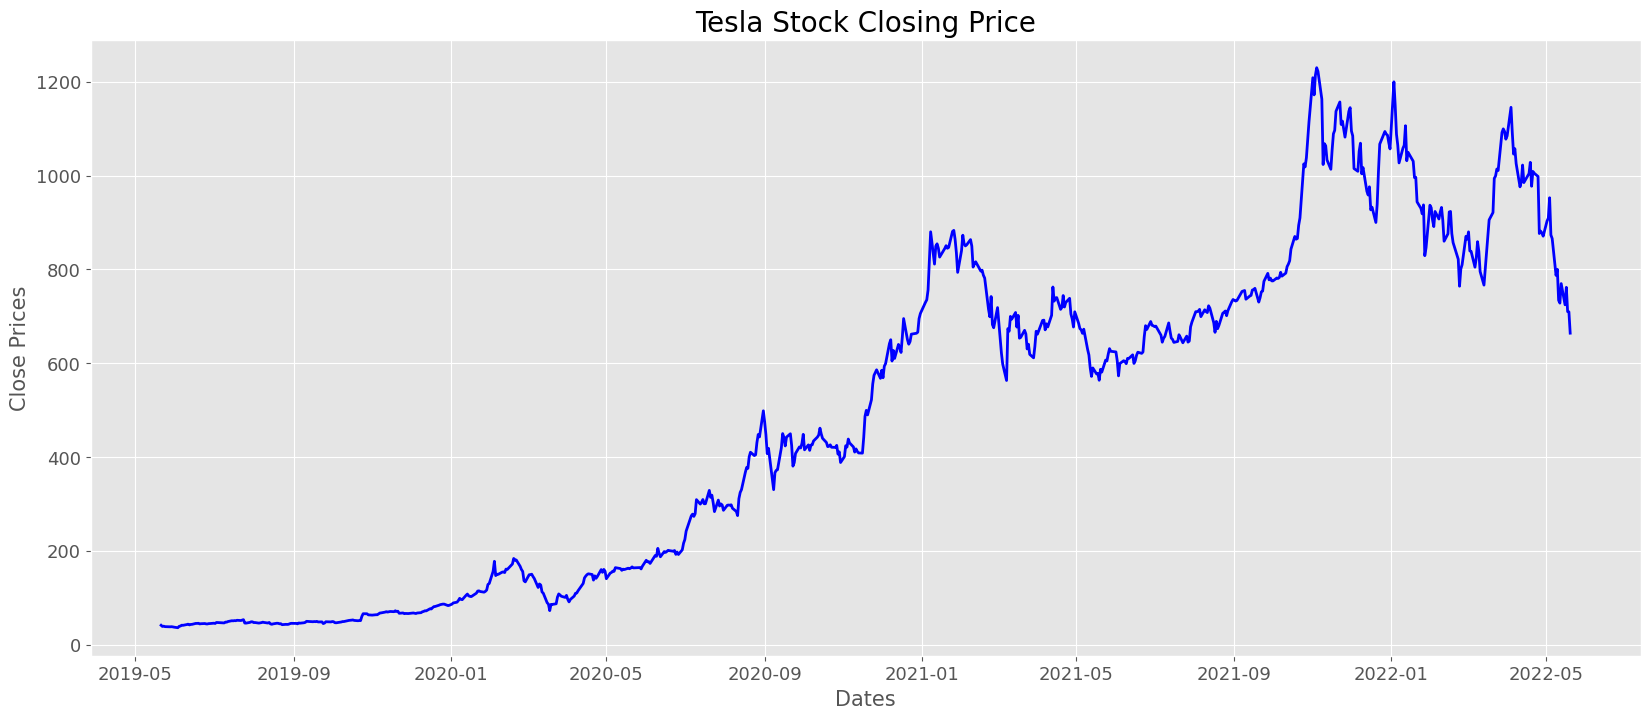

In [38]:
# Visualize the Time Series Data
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot(stock_data.Close, color='blue', linewidth=2)
plt.xlabel('Dates', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Close Prices', fontsize=15)
plt.yticks(fontsize=13)
plt.title('Tesla Stock Closing Price', fontsize=20)
plt.show()

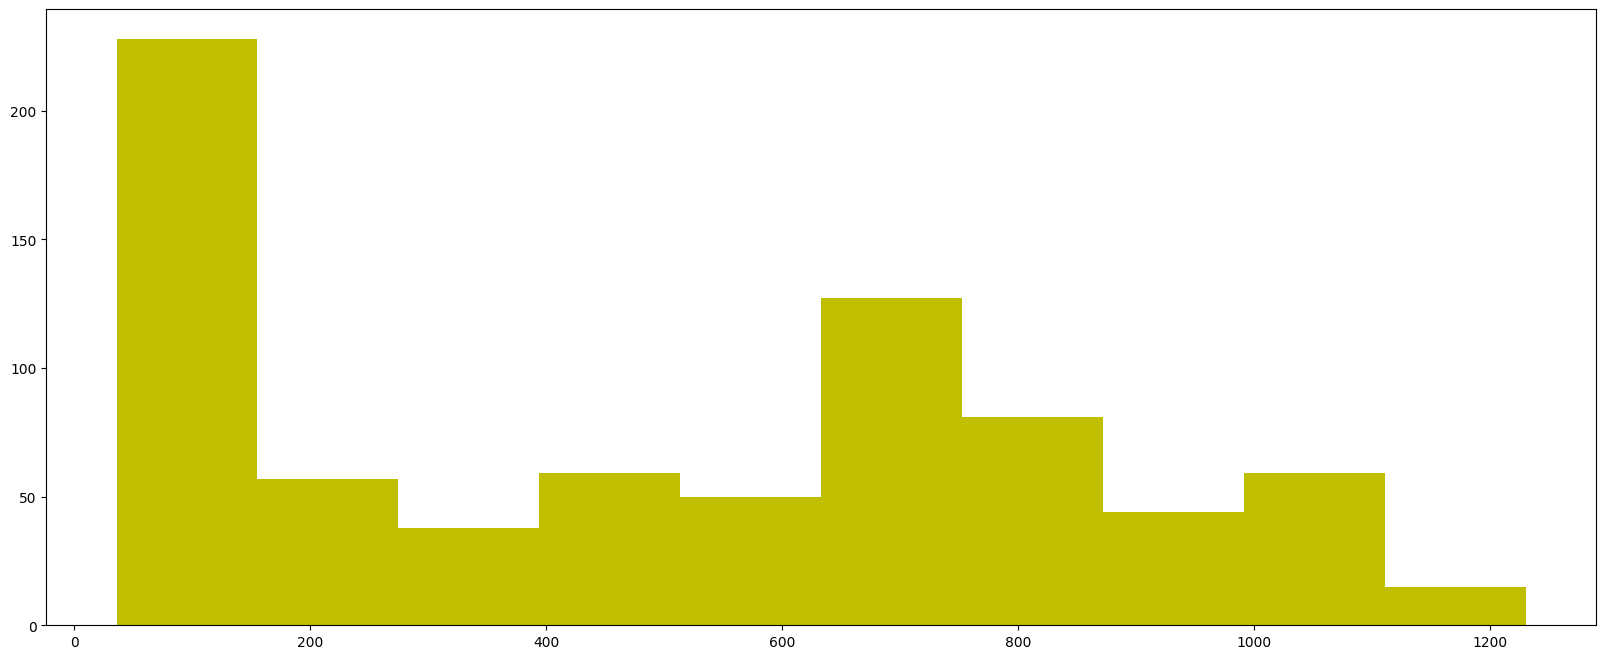

In [24]:
# Distribution of the data
plt.figure(figsize=(20,8))
plt.hist(stock_data.Close, color='y')
plt.show()

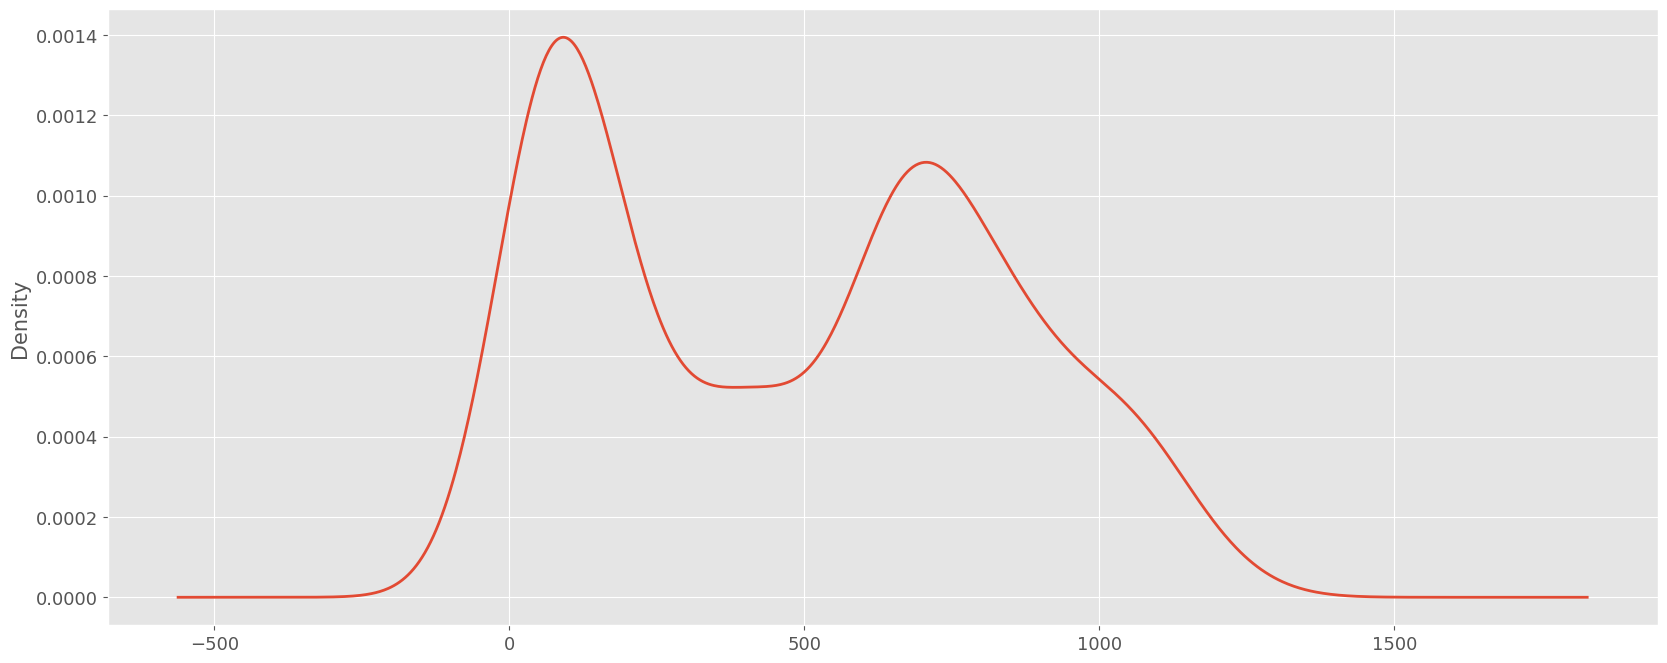

In [50]:
plt.figure(figsize=(20,8))
stock_data['Close'].plot(kind='kde', linewidth=2)
plt.ylabel('Density', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

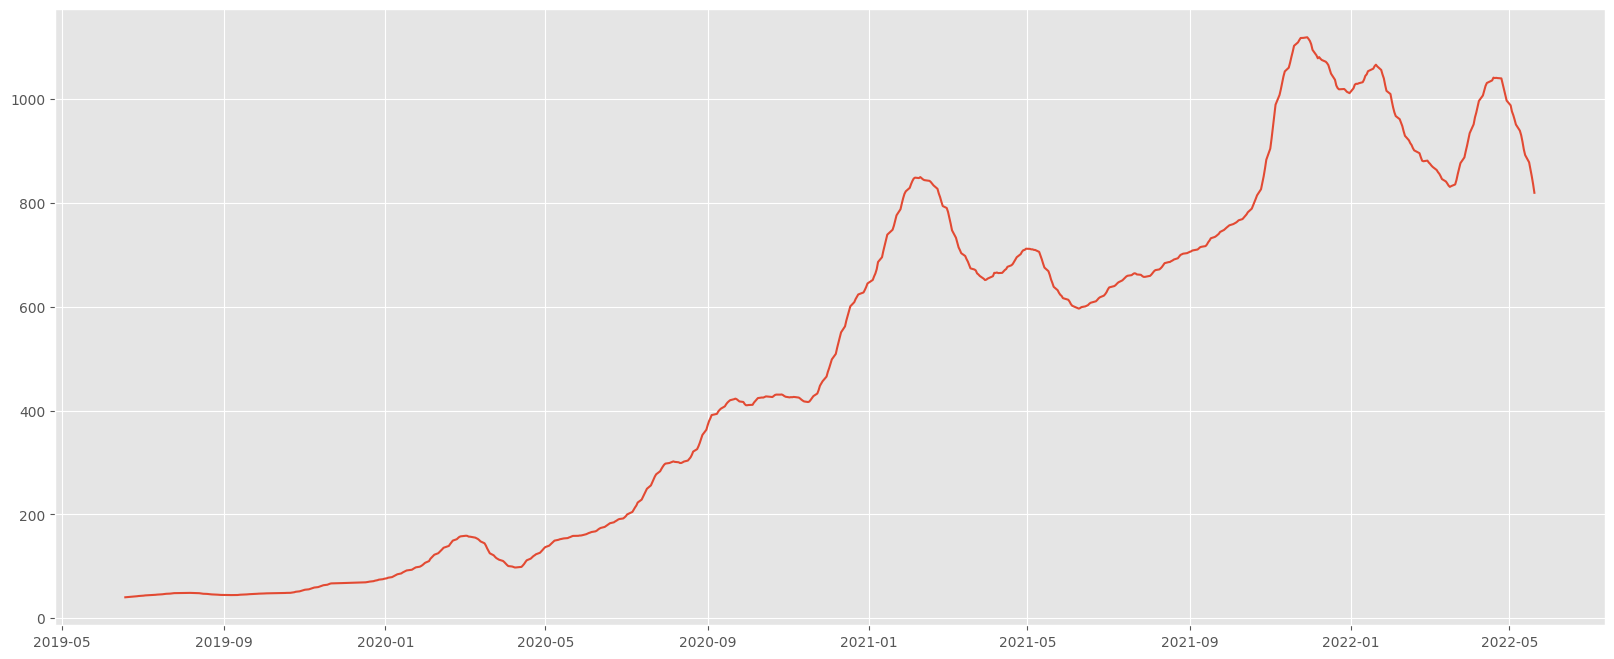

In [66]:
# Rolling Mean
# For SMOOTHING the data
rolling_mean = stock_data['Close'].rolling(20).mean()

plt.figure(figsize=(20,8))
plt.plot(rolling_mean)
plt.show()

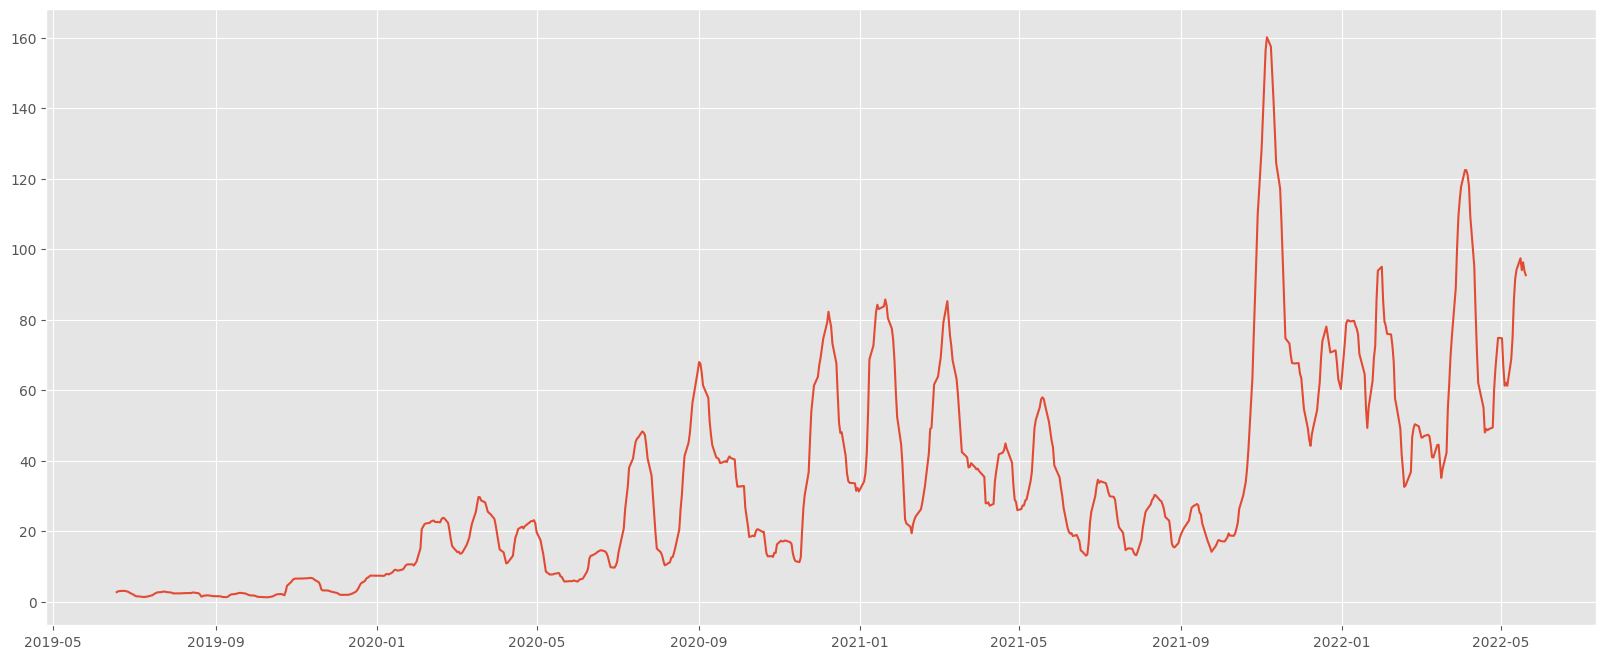

In [65]:
# Rolling Standard Deviation
# For SMOOTHING the data
rolling_std = stock_data['Close'].rolling(20).std()

plt.figure(figsize=(20,8))
plt.plot(rolling_std)
plt.show()

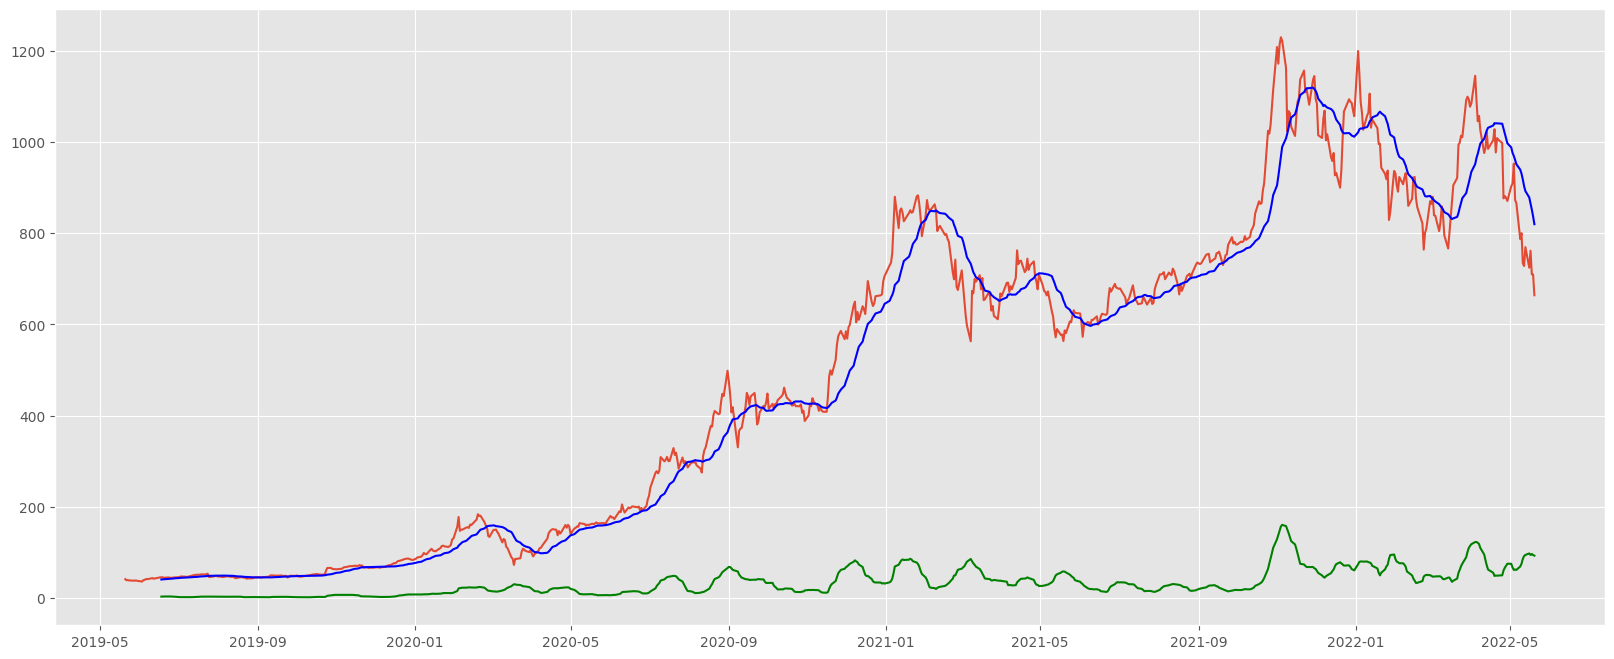

In [71]:
# Cmbine the plotings
plt.figure(figsize=(20,8))
plt.plot(stock_data['Close'])
plt.plot(rolling_mean, color='blue')
plt.plot(rolling_std, color='green')
plt.show()

In [72]:
# ADF (ada fuller test), to check wheather the Time Series is Stationary or Not
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data['Close'])

In [74]:
pd.Series(adft[0:4], index=['test stats', 'p-value', 'lag', 'data points'])
# As the p-value is greatter than 0.05, so the data is not stationary 

test stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [84]:
# Decompose the Time-Series Data
# By Default it's an Additive model

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data['Close'],period=12)
result

In [78]:
# Seasonal Component
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x800 with 0 Axes>

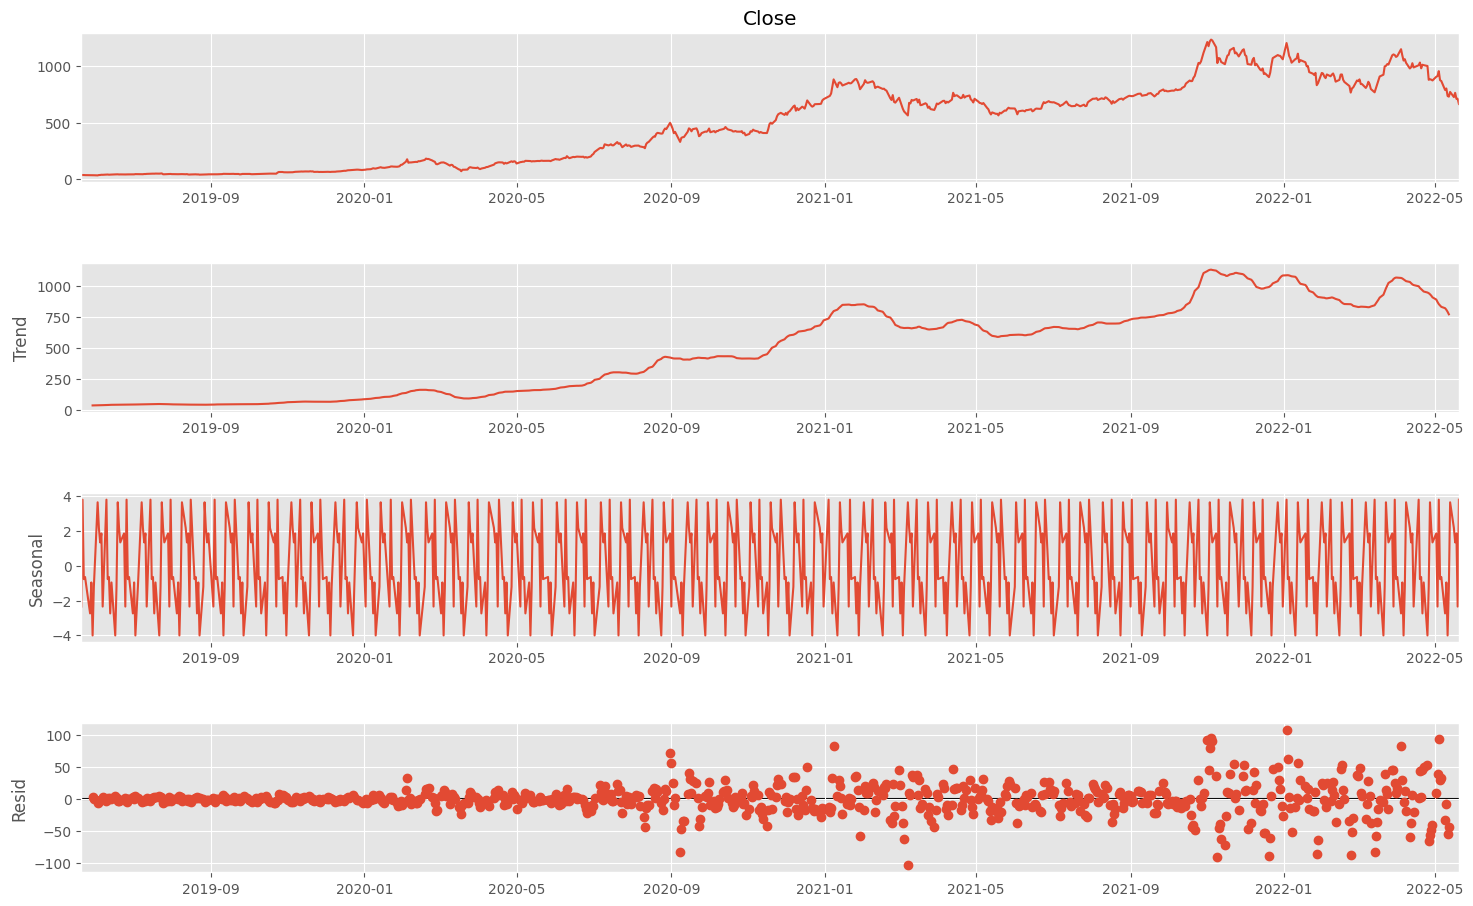

In [83]:
# Plot all of the components of the Time Series
fig = plt.figure(figsize=(20,8))
fig = result.plot()
fig.set_size_inches(17,10)

In [85]:
# Decompose the Time-Series Data
# Now we will use Multiplicative model

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data['Close'],period=12, model='multiplicative')
result

<Figure size 2000x800 with 0 Axes>

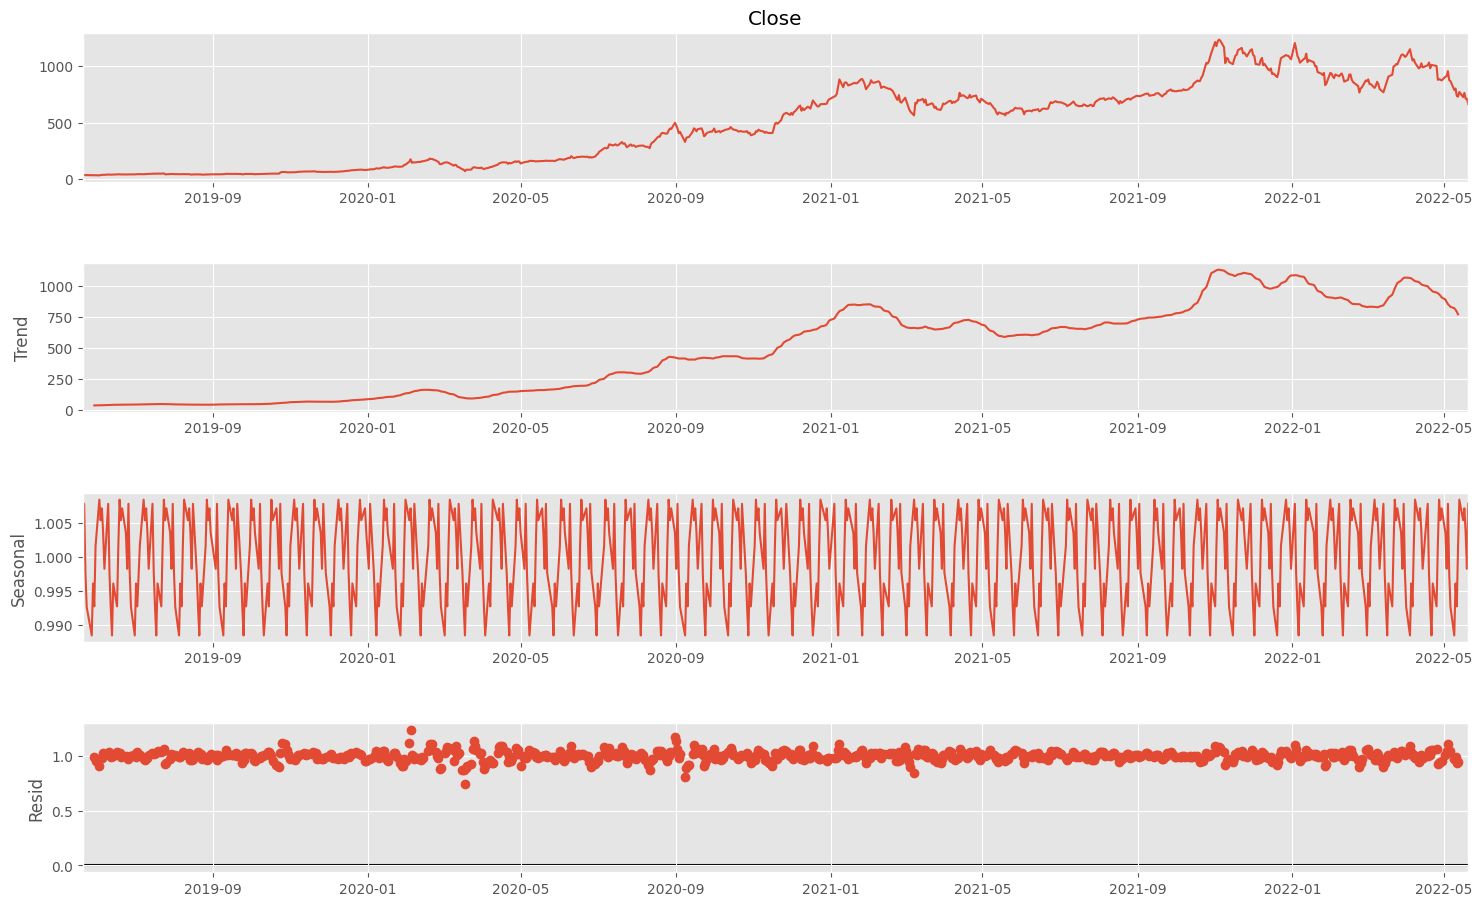

In [86]:
# Plot all of the components of the Time Series
fig = plt.figure(figsize=(20,8))
fig = result.plot()
fig.set_size_inches(17,10)

<Axes: >

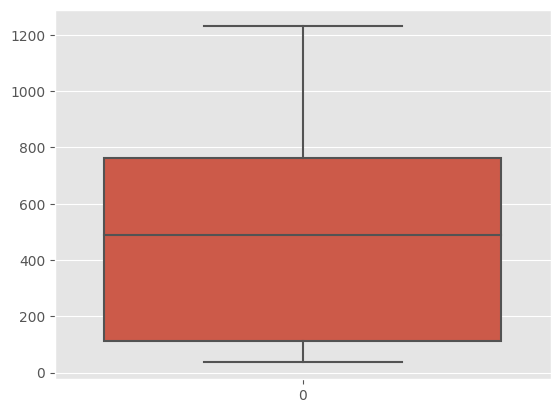

In [90]:
# Find the Outliers
sns.boxplot(stock_data['Close'])

# From the boxplot, we can see there is no outlier 

/home/utpal/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


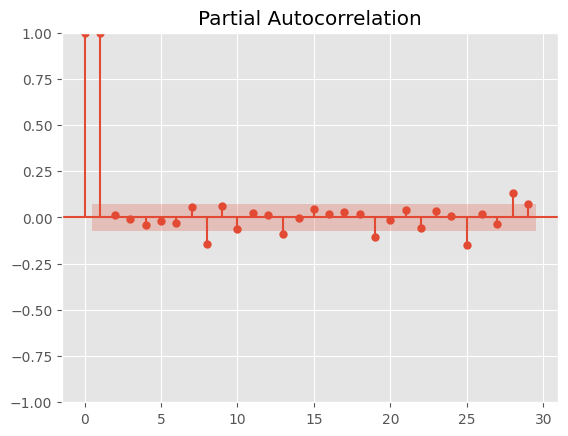

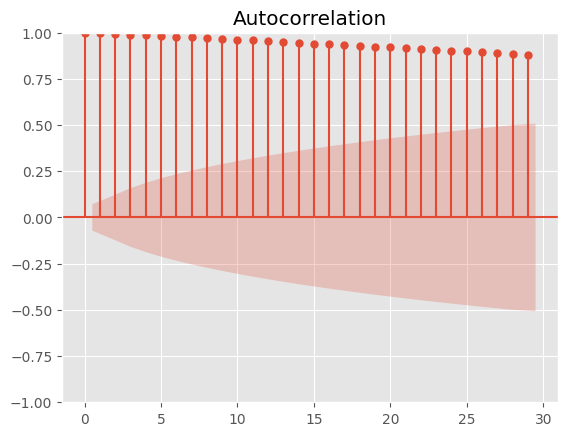

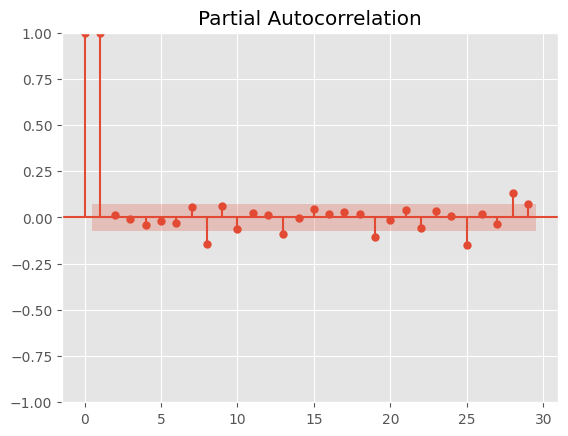

In [92]:
# Find Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data['Close'])
plot_pacf(stock_data['Close'])

## **Preprocessing of the data**
- Fill the missing Values
- Convert data into stationary time series
- If necessary, then normalize the data
- Split the data into Train and Test
- Clean the data by removing the Outlier

In [99]:
# Now we will convert the Non-Stationary data to Stationary by using differencing
df_close = stock_data['Close']
df_close = df_close.diff() # By Default it's one level differencing
df_close = df_close.dropna() # We removed the Null Values

In [102]:
# Now we check the data is stationary or not
adft = adfuller(df_close)
pd.Series(adft[0:4], index=['test stats', 'p-value', 'lag', 'data points'])

test stats    -8.324564e+00
p-value        3.498786e-13
lag            8.000000e+00
data points    7.480000e+02
dtype: float64

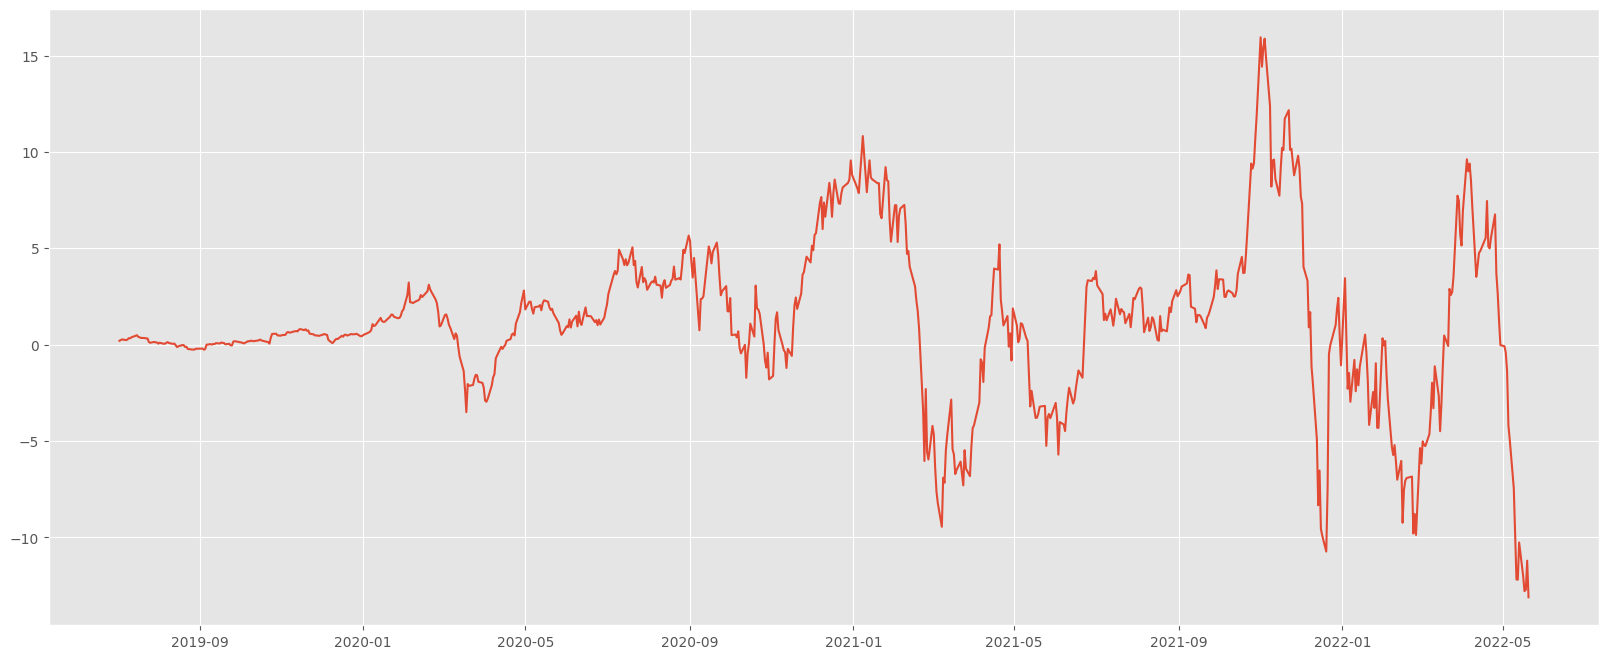

In [104]:
rolling_mean = df_close.rolling(30).mean()

plt.figure(figsize=(20,8))
plt.plot(rolling_mean)
plt.show()

/home/utpal/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


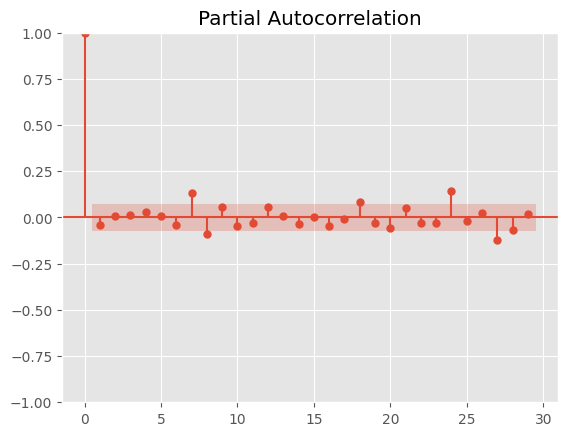

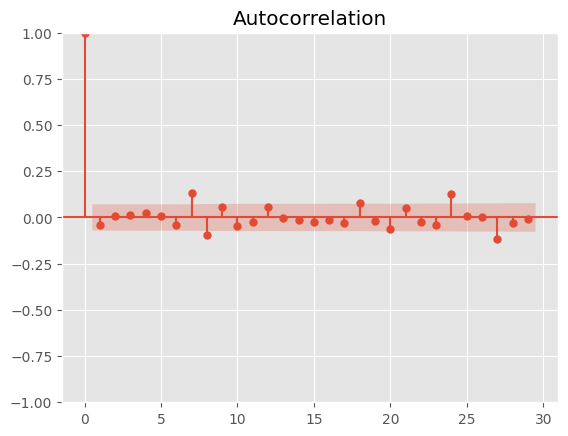

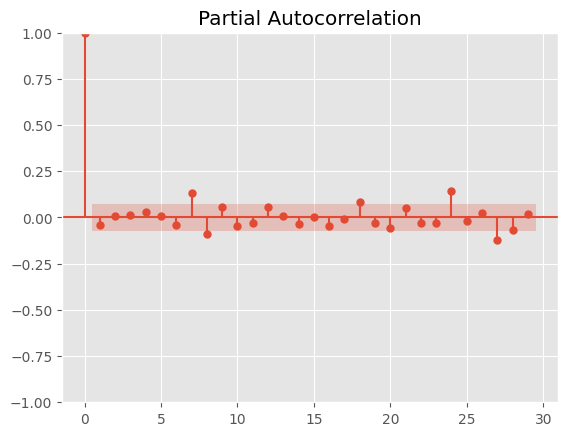

In [105]:
# Now check the ACF and PACF

plot_acf(df_close)
plot_pacf(df_close)

In [107]:
df_close.shape

(757,)

In [114]:
# Train, Test Split
train_data = df_close[0:-60]
test_data = df_close[-60:]

In [115]:
test_data.shape

(60,)

In [116]:
test_data

Date
2022-02-25      9.099976
2022-02-28     60.559998
2022-03-01     -6.059998
2022-03-02     15.520020
2022-03-03    -40.600037
2022-03-04     -1.000000
2022-03-07    -33.709961
2022-03-08     19.820007
2022-03-09     34.569946
2022-03-10    -20.669983
2022-03-11    -42.950012
2022-03-14    -28.979980
2022-03-15     35.520020
2022-03-16     38.339966
2022-03-17     31.369995
2022-03-18     33.790039
2022-03-21     15.769958
2022-03-22     72.820007
2022-03-23      5.130005
2022-03-24     14.809998
2022-03-25     -3.279968
2022-03-28     81.199951
2022-03-29      7.729980
2022-03-30     -5.579956
2022-03-31    -16.390015
2022-04-01      6.989990
2022-04-04     60.859985
2022-04-05    -54.189941
2022-04-06    -45.500000
2022-04-07     11.500000
2022-04-08    -31.770020
2022-04-11    -49.559998
2022-04-12     11.020020
2022-04-13     35.419983
2022-04-14    -37.369995
2022-04-18     19.289978
2022-04-19     23.860046
2022-04-20    -50.950012
2022-04-21     31.580017
2022-04-22     -3.73